# Hackathon Notebook

### CONTEXT

The CEO of CS-Streaming has brought you and your team in to analyse Netflix data for their new
streaming service. They are confident that your analysis will be helpful to you in making decisions about
their service. They need your expertise to uncover trends and insights from the Netflix data that will be
beneficial to their new product. They are eager to begin this project and will therefore need a timely
response.

You are to report on how CS-Streaming can best optimise its services and compete with Netflix.

### PROBLEM STATEMENT

You are to report on how CS-Streaming can best optimise its services and compete with Netflix.

IMPORT LIBRARIES

In [18]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

IMPORT DATA

In [19]:
df = pd.read_csv('netflix_titles.csv')

Key Columns in the Dataset:

1. show_id: An exclusive identifier for each show on Netflix.
2. type: Indicates whether the entry is a "Movie" or a "TV Show."
3. title: The name of the movie or TV show.
4. director: The director(s) responsible for the movie or TV show.
5. cast: The principal cast or actors featured in the movie or TV show.
6. country: The country or countries where the movie or TV show was produced.
7. date_added: The date when the movie or TV show was added to the Netflix catalogue.
8. release_year: The original release year of the movie or TV show.
9. rating: The content rating assigned to the movie or TV show (e.g., PG, TV-MA, etc.).
10. duration: For movies, the duration is in minutes; for TV shows, the number of seasons.
11. listed_in: The genre(s) or category(ies) classifying the movie or TV show.
12. description: A concise summary of the movie or TV show.


INSPECT DATA

In [20]:
#replace all empty cells with nan
df = df.replace(r'^\s*$', np.nan, regex=True)

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


OBSERVATIONS

The following columns are incomplete.

director, cast, country, date_added, rating and duration

CLEANING THE DATA

Examine and clean the data in each of the columns that are incomplete.

· For numeric columns, fill in missing values with the mean or median.

· For categorical columns 'rating', 'duration' and 'country', fill missing values with the mode or a
  placeholder like "Unknown", “Not Rated”

In [21]:
def colToFrequency(col,frame=True):
    
    '''Takes a series of objects where the data is separated by ', ' e.g. listed_in.
    If frame=True, returns dataframe orderd by count of each item e.g. genre.
    Else, returns dictionary {item:count}'''
    
    col_list=col.dropna().to_list()
    col_dict = dict()
    for string in col_list:
        for item in string.split(', '):
            if item in col_dict.keys():
                col_dict[item]+=1
            elif item == '': continue
            else:
                col_dict[item]=1
                
    if frame: 
        return pd.DataFrame.from_dict(col_dict, orient='index', columns=['count'])\
        .sort_values('count', ascending=False).reset_index(names=col.name)
    else: 
        return col_dict

In [22]:
df['date_added'] = pd.to_datetime(df.date_added)
df['month'] = df['date_added'].dt.month_name()
df['day'] = df['date_added'].dt.day
df['year'] = df['date_added'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  month         8797 non-null   object        
 13  day           8797 non-null   float64       
 14  year          8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int6

In [23]:
df.duration.fillna(df['rating'], inplace=True)
# change all ratings that are not actually ratings to nan
rating_list = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R','TV-G', 'G', 'NC-17','NR','TV-Y7-FV', 'UR']
df.loc[~df.rating.isin(rating_list),'rating'] = np.nan
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,day,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,25.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24.0,2021.0


In [24]:
dup = len(df[df.description.duplicated(keep='last')].sort_values('description'))
s = f"""There are at least {dup} duplicates by "description".
This is mainly due to titles being released in multiple languages"""
print(s)

There are at least 32 duplicates by "description".
This is mainly due to titles being released in multiple languages


In [25]:
#there are 3 duplicates that we should definitely delete
#these are titles that have been duplicated because their names ARE dates. 
df = df.drop(df.loc[df['title'].str.contains('Feb-09|15-Aug|22-Jul',regex=True)].index)

In [26]:
country_freq = colToFrequency(df.country)
genre_freq = colToFrequency(df.listed_in)
actor_freq = colToFrequency(df.cast)

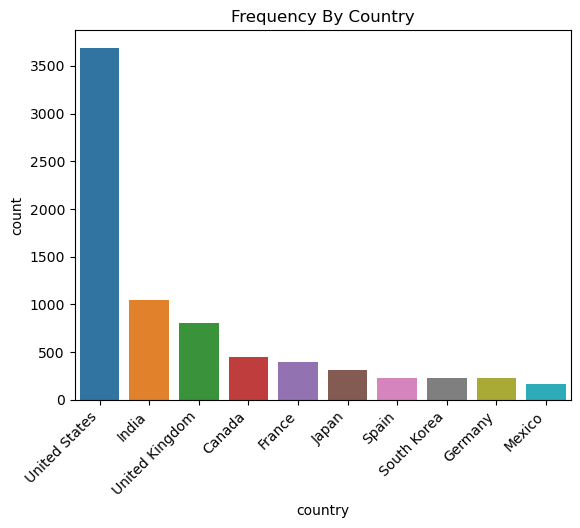

In [36]:
#sns.barplot(data=country_freq.head(10), x='country', y='count', hue='country',legend=False, palette='flare')
#sns.barplot(data=country_freq.head(10), x='country', y='count', hue='country', palette='flare')
#sns.barplot(data=country_freq.head(10), x='country', y='count', hue='country')
sns.barplot(x='country', y='count', data=country_freq.head(10)).set(title='Frequency By Country')
plt.xticks(rotation = 45, ha='right');



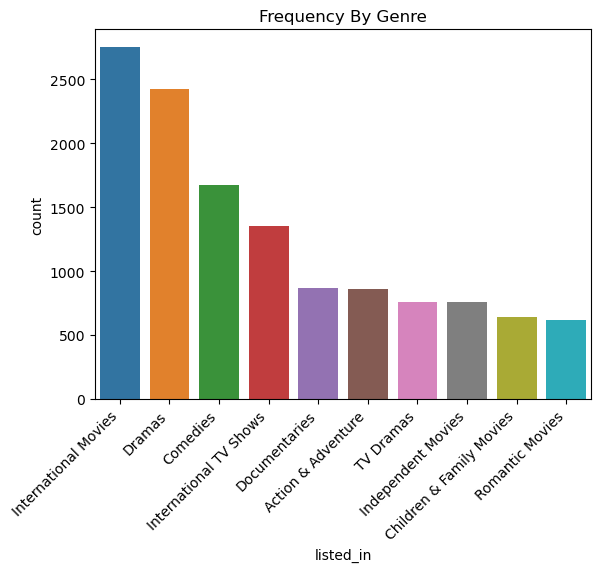

In [37]:
#sns.barplot(data=genre_freq.head(10), x='listed_in', y='count', hue='listed_in', palette='pastel')
sns.barplot(x='listed_in', y='count', data=genre_freq.head(10)).set(title='Frequency By Genre')
plt.xticks(rotation = 45, ha='right');

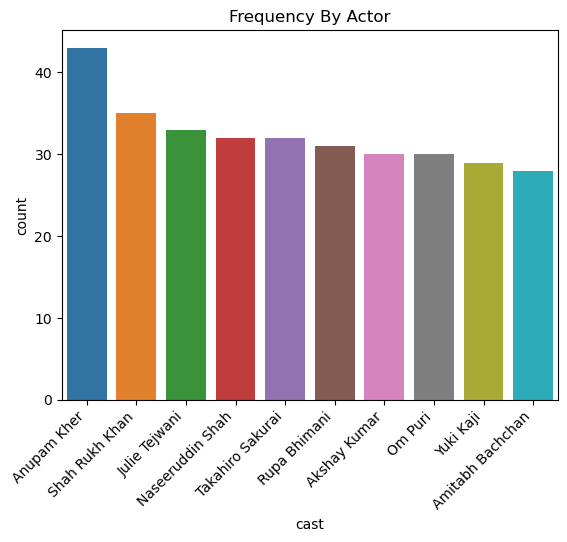

In [38]:
#sns.barplot(data=actor_freq.head(10), x='cast', y='count', hue='cast', palette='viridis')
sns.barplot(x='cast', y='count', data=actor_freq.head(10)).set(title='Frequency By Actor')
plt.xticks(rotation = 45, ha='right');

Examine the date_added column

Create Additional Features:
    
· Extract month and year from the ' date_added' column for time-based analysis.

In [97]:
#df['date_added'] = pd.to_datetime(df.date_added)
#df['month'] = df['date_added'].dt.month_name()
#df['day'] = df['date_added'].dt.day
#df['year'] = df['date_added'].dt.year
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  month         8797 non-null   object        
 13  day           8797 non-null   float64       
 14  year          8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int6

Convert Data Types:
    
· Ensure that the ' date_added' column is in datetime format.
· Ensure that the ' release_year' column is in the correct numeric format.

In [98]:
#df['date_added'] = pd.to_datetime(df.date_added)
#df['mergedate'] = pd.to_datetime(df.date_added)
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  month         8797 non-null   object        
 13  day           8797 non-null   float64       
 14  year          8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int6

In [99]:
#df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,day,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,25.0,2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Listed,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24.0,2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24.0,2021.0


Clean Categorical Data:

· Standardize capitalization in categorical columns 'type' and 'rating' for consistency.

In [100]:
#unique_type = df['type'].unique
#unique_type

<bound method Series.unique of 0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object>

In [101]:
#unique_rating = df['rating']
#unique_rating

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

Remove Duplicates:
    
· Check for and remove any duplicate entries.

In [102]:
#duplicated_rows = df[df.duplicated()]
#duplicated_rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,day,year


Data Exploration:
    
1. Visualize the data using various techniques.
2. Identify any trends or patterns in the data.
3. Conduct statistical analysis to explore relationships between variables.


# New Groupby Version - much much faster!

In [103]:
#df['country'] = df['country'].astype(str)

In [104]:
#countries = df['country'].to_list()
#new_list = []
#for c in countries:
    #country = c.split(',')[0]
    #new_list.append(country)
#countries_list = list(set(new_list))

#len(countries_list)

87

In [105]:
#df['country_amended'] = df['country'].str.split(',').str[0]

In [106]:
#df.country_amended.value_counts()

United States     3211
India             1008
Unknown            831
United Kingdom     628
Canada             271
                  ... 
Namibia              1
Senegal              1
Luxembourg           1
Syria                1
Somalia              1
Name: country_amended, Length: 87, dtype: int64

In [107]:
#country_groups = df.groupby('country_amended')

In [108]:
#def find_genres(df):
    #country_groups = df.groupby('country_amended')
    #genre_dict = {}

    #for name, group in country_groups:
        #genres = []

        #for index, row in group.iterrows():
            #genre = row['listed_in'].split(',')
            #for i in genre:
                #genres.append(i)

        #genre_dict[name] = genres

    #return genre_dict

In [109]:
#country_genres = find_genres(df)

In [110]:
#uk_genres = country_genres.get('United Kingdom')
#len(uk_genres)

1413

In [111]:
#print(uk_genres)

['British TV Shows', ' Reality TV', 'British TV Shows', ' International TV Shows', ' TV Comedies', "Kids' TV", 'British TV Shows', ' Docuseries', ' International TV Shows', 'Children & Family Movies', ' Comedies', 'British TV Shows', " Kids' TV", 'Dramas', ' Romantic Movies', 'Documentaries', 'Thrillers', 'Action & Adventure', ' Children & Family Movies', ' Cult Movies', 'Action & Adventure', ' Classic Movies', 'Dramas', ' Independent Movies', 'Documentaries', ' Music & Musicals', 'Comedies', ' Romantic Movies', 'Comedies', ' Dramas', ' Independent Movies', 'Documentaries', 'Comedies', 'British TV Shows', ' International TV Shows', ' Reality TV', 'Dramas', ' Romantic Movies', 'British TV Shows', ' International TV Shows', ' TV Comedies', 'British TV Shows', ' International TV Shows', ' TV Comedies', 'British TV Shows', ' Crime TV Shows', ' Docuseries', 'British TV Shows', ' Crime TV Shows', ' International TV Shows', 'British TV Shows', ' International TV Shows', ' TV Dramas', 'British

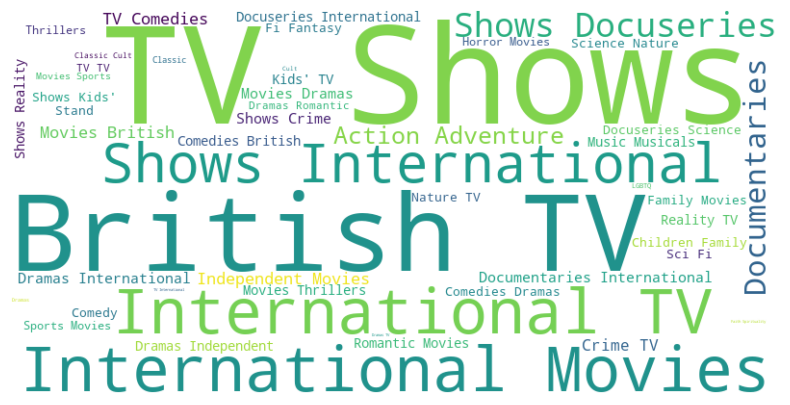

In [112]:
#!pip install wordcloud
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt

# Convert the list of genres into a string
#genres_text = ' '.join(uk_genres)

# Generate the word cloud
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud using matplotlib
#plt.figure(figsize=(10, 5))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')  # Turn off axis
#plt.show()

# Jonah's Col to frequency func

In [113]:
#def colToFrequencyDict(col):
    #col_list=col.dropna().to_list()
    #col_dict = dict()
    #for string in col_list:
        #for item in string.split(', '):
            #if item in col_dict.keys():
                #col_dict[item]+=1
            #else:
                #col_dict[item]=1
    #return col_dict


In [114]:
#freq = colToFrequencyDict(df['listed_in'])

In [115]:
# Shows top 10 by Genre/Tag

#p = pd.DataFrame.from_dict(freq, orient='index').reset_index()
#p = p.rename(columns={'index':'type', 0:'qty'}, errors='raise')
#p = p.sort_values(by='qty', ascending=False).iloc[:10]
#p

,type,qty
14,International Movies,2752
12,Dramas,2427
16,Comedies,1674
1,International TV Shows,1351
0,Documentaries,869
25,Action & Adventure,859
2,TV Dramas,763
13,Independent Movies,756
11,Children & Family Movies,641
19,Romantic Movies,616


# Content Type Division

In [116]:
#content_type = df.groupby('type')['type'].count().reset_index(name='count')
#content_type

,type,count
0,Movie,6131
1,TV Show,2676


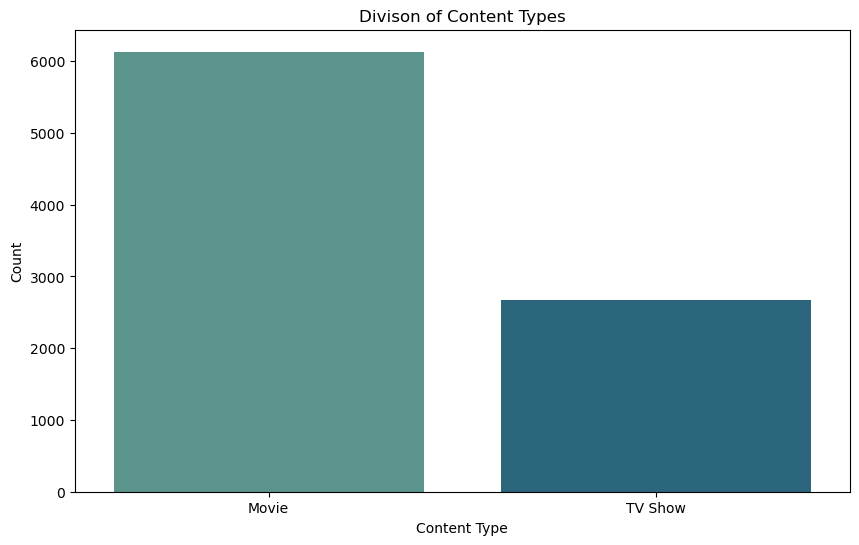

In [117]:
# Seaborn chart of Content Type

#plt.figure(figsize=(10, 6))
#sns.barplot(x = content_type['type'], y = content_type['count'],  palette = 'crest')#, ci=None)
#plt.xlabel('Content Type')
#plt.ylabel('Count')
#plt.title('Divison of Content Types')
#

# Top 10 Directors & Chart

In [118]:
#director_count = df.director.value_counts().to_frame()
#director_count = director_count.drop('Unknown').head(10)
#director_count

,director
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12
Steven Spielberg,11


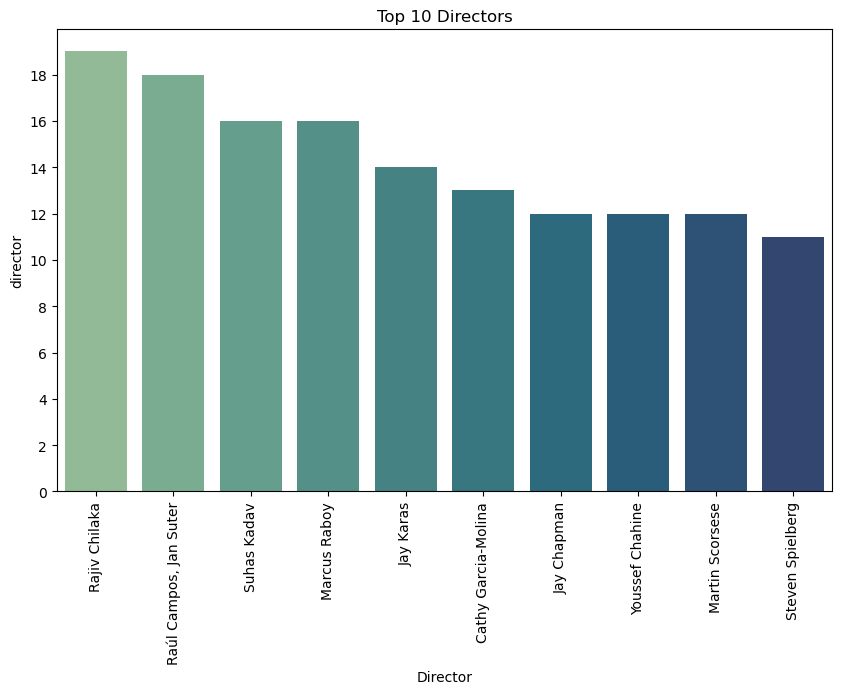

In [119]:
# Seaborn chart of top 10 Directors

#plt.figure(figsize=(10, 6))
#sns.barplot(director_count, x=director_count.index, y='director', palette='crest')
#plt.xticks(rotation=90)
#plt.title('Top 10 Directors')
#plt.xlabel('Director')
#plt.yticks(range(0, int(max(director_count['director'])) + 1, 2))

#plt.show()

# Top 10 Production Countries

In [120]:
#country = colToFrequencyDict(df['country'])

In [121]:
# Top 10 Production Countries

#c = pd.DataFrame.from_dict(country, orient='index').drop('Unknown').reset_index()
#c = c.rename(columns={'index':'country', 0:'qty'}, errors='raise')
#c = c.sort_values(by='qty', ascending=False).iloc[:10]
#c

,country,qty
0,United States,3689
2,India,1046
5,United Kingdom,804
15,Canada,445
12,France,393
16,Japan,318
18,Spain,232
20,South Korea,231
6,Germany,226
9,Mexico,169


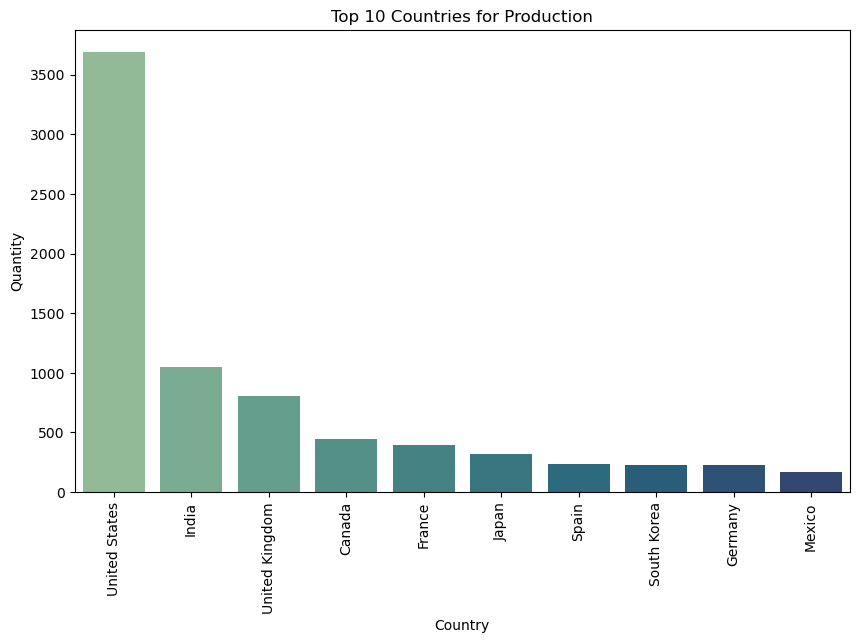

In [122]:
#plt.figure(figsize=(10, 6))
#sns.barplot(c, x='country', y='qty', palette='crest')
#plt.xticks(rotation=90)
#plt.title('Top 10 Countries for Production')
#plt.xlabel('Country')
#plt.ylabel('Quantity')
#plt.show()

Data Analysis:

1. Analyse the data to gain insights into user behaviour and preferences.
2. Use clustering techniques to identify different groups of users or movies.
3. Test your hypotheses to verify any observations or conclusions.

Recommendations:

1. Draw conclusions and make recommendations based on the insights.
2. Present your findings in a clear and concise manner using data visualisation tools and charts.

Deliverables:
    
1. Your code (e.g. Jupyter Notebook file)
2. A set of visualisations to support the report.
3. A presentation to the class highlighting the key findings and recommendations.


Evaluation

Students will be evaluated based on the quality of their report, visualisations, and presentation.
Specifically, students will be evaluated on their ability to:
● Accurately analyse and interpret the data
● Use appropriate data analysis and visualisation techniques
● Draw valid conclusions and make sound recommendations based on their findings
● Clearly and effectively communicate their results to the class
If you have any questions or need any additional information, please do not hesitate to reach out